# Netflix Userbase Dataset

 In this notebook we perform basic Netflix Userbase Dataset available on link down below

 https://www.kaggle.com/datasets/arnavsmayan/netflix-userbase-dataset?select=Netflix+Userbase.csv


First of all, we load the libraries needed to analysis

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans as km
from sklearn.preprocessing import StandardScaler as sds
from tables.table import Column
from pandas.io.pytables import attribute_conflict_doc

Creating some variables

In [6]:
folder_path = '/content/drive/MyDrive/WinterSchool/DataMining /Project '
csv_filename = 'NetflixUserbase.csv'
csv_path = f'{folder_path}/{csv_filename}'
a = 8
b = 7

Here we're importing and mounting the dataset

In [7]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


Here we can see the dataset's path

In [8]:
%cd folder_path

[Errno 2] No such file or directory: 'folder_path'
/content


libraries loaded, dataset imported, now we can analyze

In [9]:
ds = pd.read_csv(csv_path)
# dataset loaded

Below 👇 we'll describe the dataset(ds) to see some statistics information

In [10]:
ds.describe(include="all")

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
count,2500.00000,2500,2500.000000,2500,2500,2500,2500.000000,2500,2500,2500
unique,NaN,3,NaN,300,26,10,NaN,2,4,1
top,NaN,Basic,NaN,05-11-22,28-06-23,United States,NaN,Female,Laptop,1 Month
freq,NaN,999,NaN,33,164,451,NaN,1257,636,2500
mean,1250.50000,NaN,12.508400,NaN,NaN,NaN,38.795600,NaN,NaN,NaN
std,721.83216,NaN,1.686851,NaN,NaN,NaN,7.171778,NaN,NaN,NaN
min,1.00000,NaN,10.000000,NaN,NaN,NaN,26.000000,NaN,NaN,NaN
25%,625.75000,NaN,11.000000,NaN,NaN,NaN,32.000000,NaN,NaN,NaN
50%,1250.50000,NaN,12.000000,NaN,NaN,NaN,39.000000,NaN,NaN,NaN
75%,1875.25000,NaN,14.000000,NaN,NaN,NaN,45.000000,NaN,NaN,NaN


In [11]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


In [12]:
print("-> Number of attributes:" , ds.shape[1])

-> Number of attributes: 10


In [13]:
print("-> Length of dataset : ", len(ds))

-> Length of dataset :  2500


In [14]:
print("-> Columns: ", ds.columns)

-> Columns:  Index(['User ID', 'Subscription Type', 'Monthly Revenue', 'Join Date',
       'Last Payment Date', 'Country', 'Age', 'Gender', 'Device',
       'Plan Duration'],
      dtype='object')


In [15]:
print("-> Data type for each attribute: ")
print(ds.dtypes)

-> Data type for each attribute: 
User ID               int64
Subscription Type    object
Monthly Revenue       int64
Join Date            object
Last Payment Date    object
Country              object
Age                   int64
Gender               object
Device               object
Plan Duration        object
dtype: object


In [16]:
print("-> Data Duplicate: ", ds.duplicated())

-> Data Duplicate:  0       False
1       False
2       False
3       False
4       False
        ...  
2495    False
2496    False
2497    False
2498    False
2499    False
Length: 2500, dtype: bool


As we can see ☝️ we don't have duplications in our dataset, so no need to clean it  




Printing the first 5 tuples of the datasets 👇

In [17]:
ds.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


And here the first 15 tuples of the dataset 👇

In [18]:
ds.head(15)

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month
5,6,Premium,15,18-03-22,27-06-23,France,29,Female,Smart TV,1 Month
6,7,Standard,12,09-12-21,25-06-23,Brazil,46,Male,Tablet,1 Month
7,8,Basic,10,02-04-23,24-06-23,Mexico,39,Female,Laptop,1 Month
8,9,Standard,12,20-10-22,23-06-23,Spain,37,Male,Smartphone,1 Month
9,10,Premium,15,07-01-23,22-06-23,Italy,44,Female,Smart TV,1 Month


let's see if we have missing value in our dataset

# Completeness  Analysis

In [19]:
count_values = ds.count().sum()
count_null = ds.isnull().sum().sum()
nr_values = count_values + count_null
completeness = (count_values / nr_values)*100
print(f'We {completeness}% of completeness values')

We 100.0% of completeness values


As we can see☝️, we don't have missing values otherwise the completeness wouldn't be 100%

# some graphics analysis

Here 👇 we can see how the subscription types are distributed



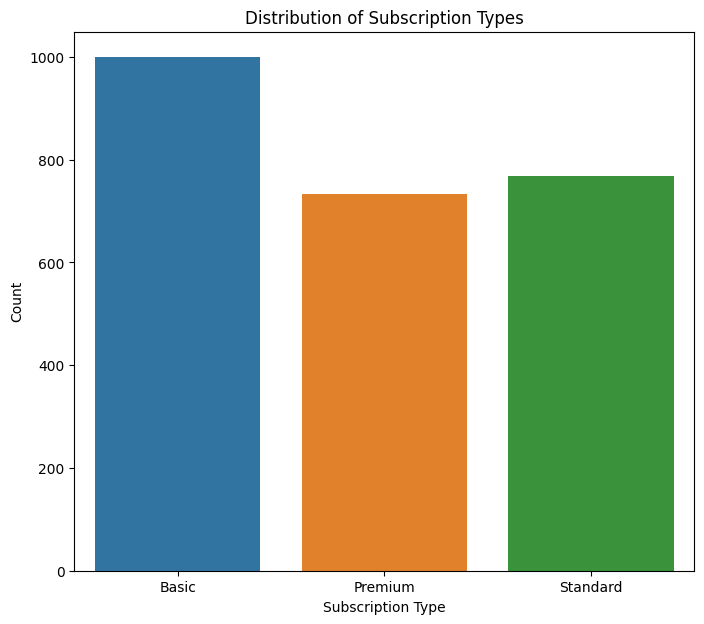

In [20]:
plt.figure(figsize=(a, b))
sb.countplot(data=ds, x="Subscription Type")
plt.xlabel("Subscription Type")
plt.ylabel("Count")
plt.title("Distribution of Subscription Types")
plt.show()

Let's suppose we want to see the most predominant genter in our dataset



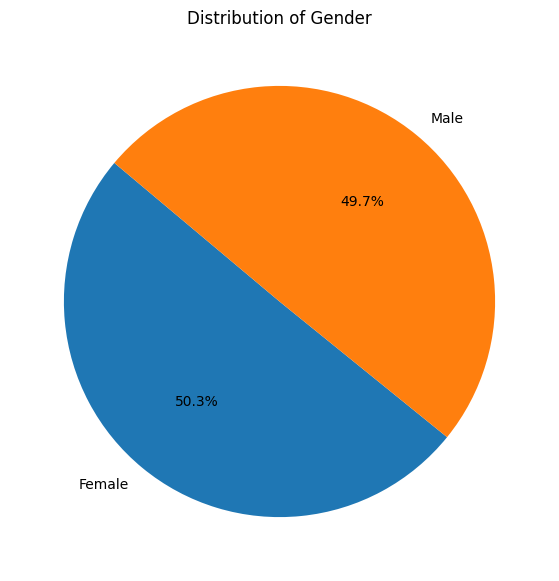

In [21]:
gender_counts = ds["Gender"].value_counts()
plt.figure(figsize=(a, b))
plt.pie(gender_counts, labels=gender_counts.index, autopct="%1.1f%%", startangle=140)
plt.title("Distribution of Gender")
plt.show()

Down below, we can see the Monthly Revenue in relation to Age

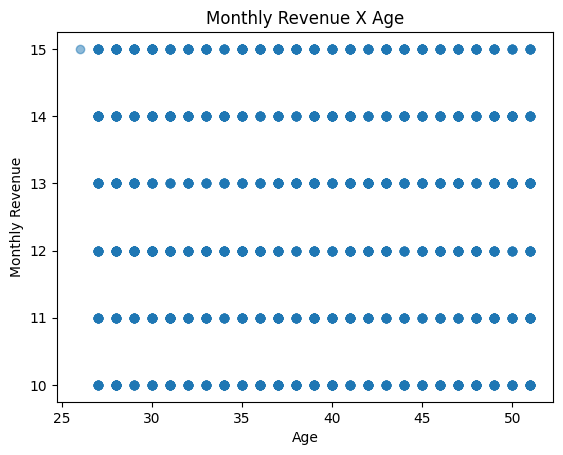

In [25]:
plt.scatter(ds['Age'], ds['Monthly Revenue'], alpha=0.5)
plt.title('Monthly Revenue X Age')
plt.xlabel('Age')
plt.ylabel('Monthly Revenue')
plt.show()

what if we want to see how the genres are distributed by each country? in this case we can use the stacked bar chart, which can be a form of visualization that allows us to place different categories in the same bar, one above the other to facilitate visualization in some cases.

We can see it on the exemplo down below 👇

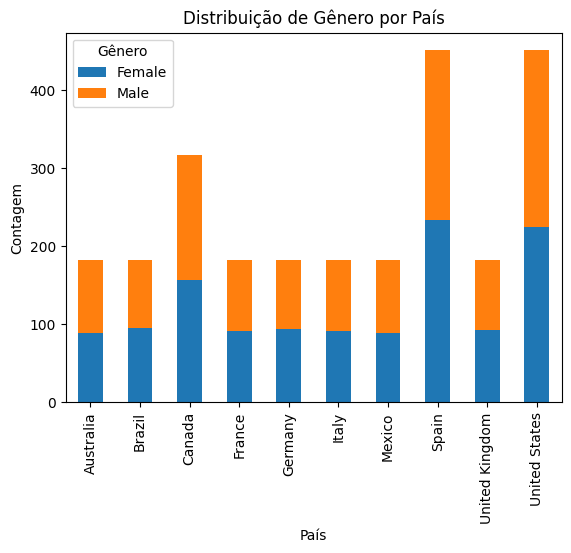

In [26]:
cross_table = pd.crosstab(ds['Country'], ds['Gender'])
cross_table.plot(kind='bar', stacked=True)
plt.title('Gender Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Score')
plt.legend(title='Gender')
plt.show()


Below we will use the Elbow method, along with the K-means algorithm to determine the optimal number of clusters

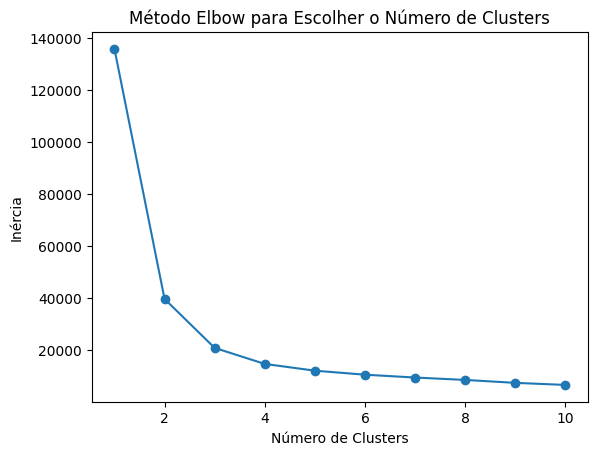

In [36]:
import matplotlib.pyplot as plt

inertia = []
for k in range(1, 11):
    kmeans = km(n_clusters=k,n_init=10, random_state=0)
    kmeans.fit(ds[['Age', 'Monthly Revenue']])
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Choosing the Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


As we can see ☝️ we have our Elbow between 2 and 4

### We can use the 'pair plot to create a matrix of scatterplots.
### In this graph, each variable is compared with all other variables.

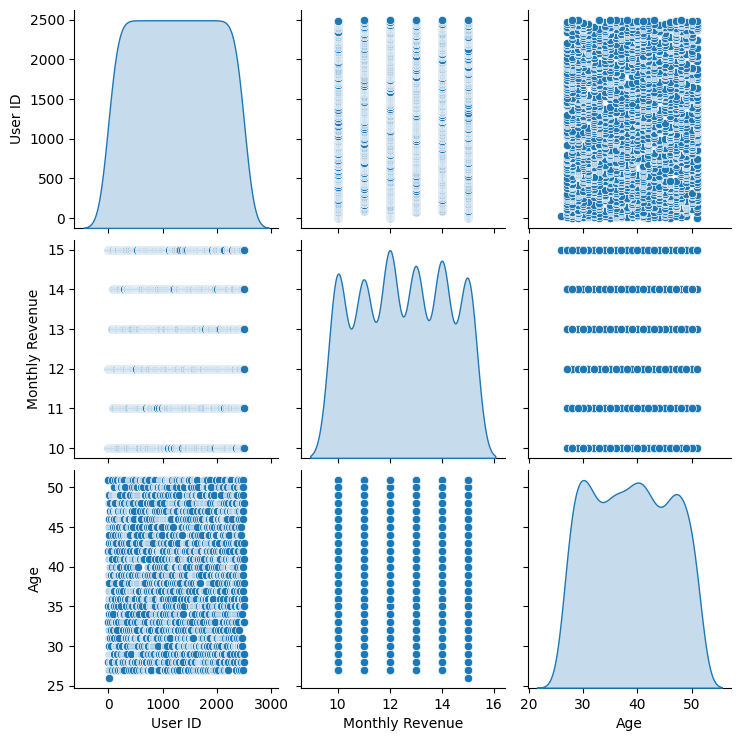

In [38]:
sb.pairplot(ds, diag_kind='kde')
plt.show()

In [39]:
ds

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month
...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,25-07-22,12-07-23,Spain,28,Female,Smart TV,1 Month
2496,2497,Basic,15,04-08-22,14-07-23,Spain,33,Female,Smart TV,1 Month
2497,2498,Standard,12,09-08-22,15-07-23,United States,38,Male,Laptop,1 Month
2498,2499,Standard,13,12-08-22,12-07-23,Canada,48,Female,Tablet,1 Month


<ipython-input-43-9fa4be02bd60>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = ds.corr()


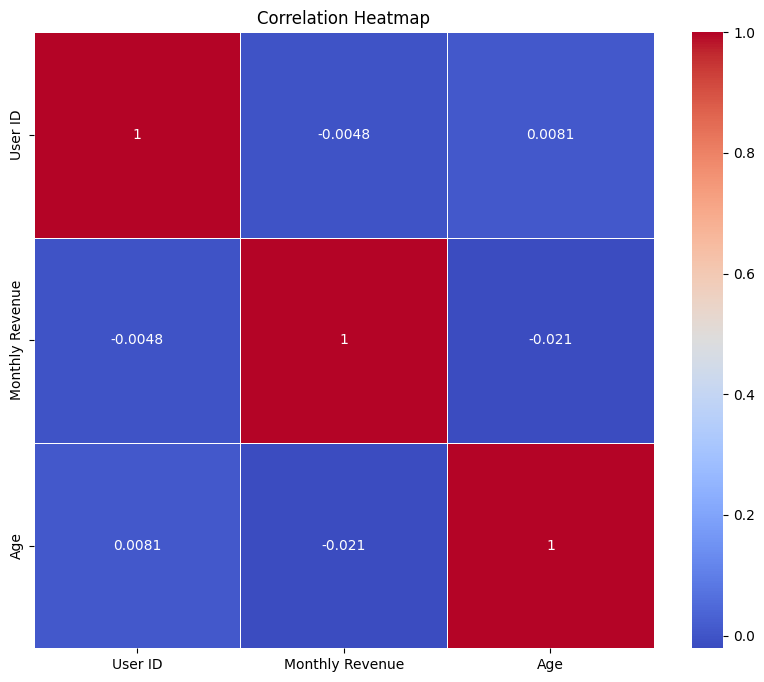

In [43]:
correlation_matrix = ds.corr()

plt.figure(figsize=(10, 8))
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

Here 👇 we can see the corrections

<ipython-input-45-b992a728a264>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.clustermap(ds.corr(), square=True, annot=True, cmap="Blues");
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:1124: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


<Figure size 800x47.8857 with 0 Axes>

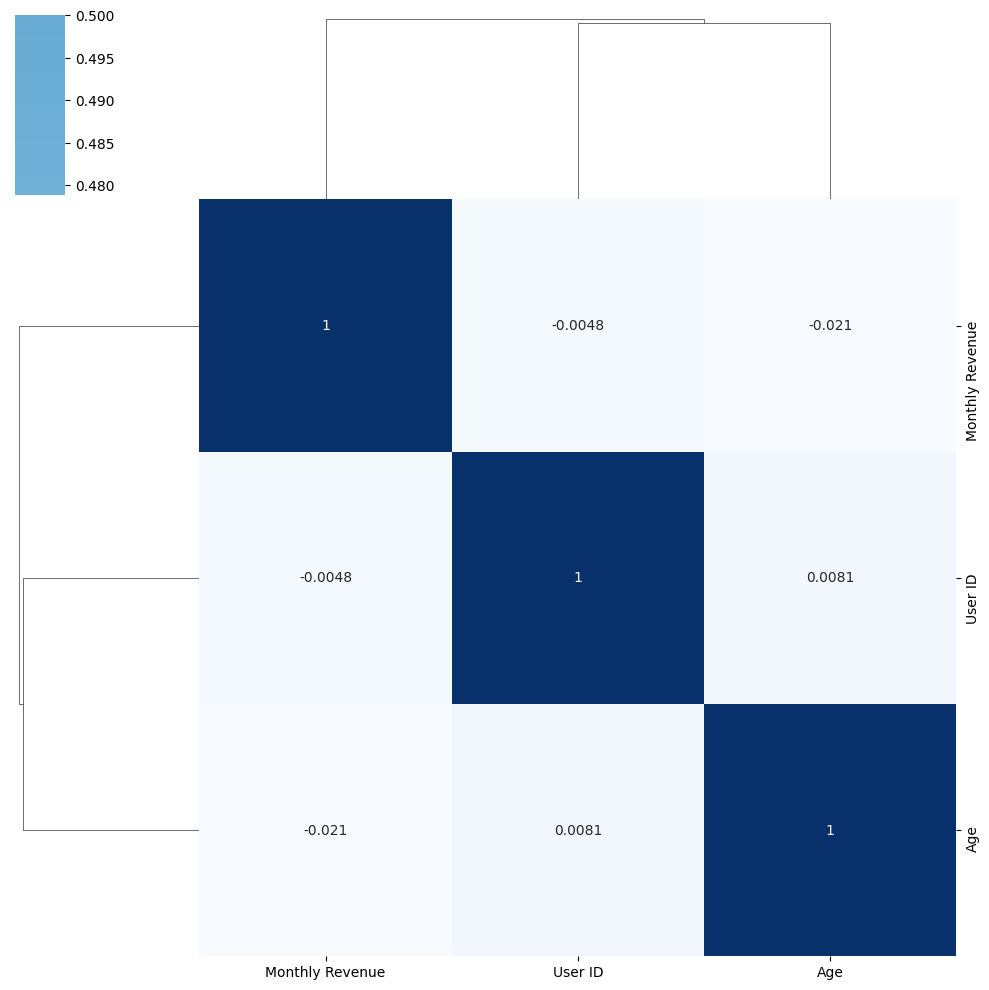

In [45]:
plt.figure(figsize=(a,b))
sb.clustermap(ds.corr(), square=True, annot=True, cmap="Blues");
# these lines are here only to correct a matplotlib bug
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t); # update the ylim(bottom, top) values
#

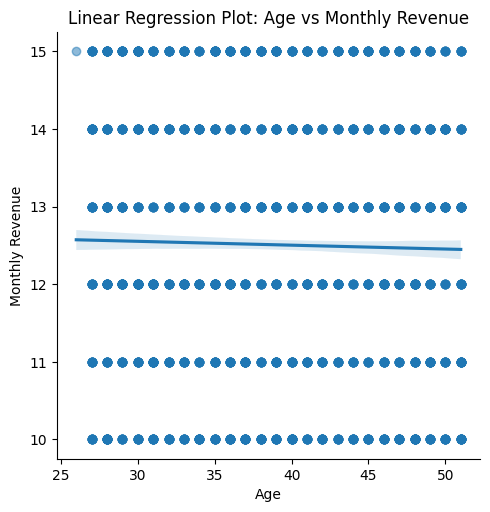

In [50]:
# Assuming 'data' is your DataFrame
sb.lmplot(x='Age', y='Monthly Revenue', data=ds, scatter_kws={'alpha':0.5})
plt.title('Linear Regression Plot: Age vs Monthly Revenue')
plt.show()

Here ☝️ we are using the Implot function to create a scatter plot of the variables ('Age' and 'Monthly Income'), as we can see we have a linear regression line